Note : This notebook is designed for Google Colab. You should be able to use it elsewhere with some adjustments.

Make sure we have a GPU with CUDA:

In [1]:
import torch
print("CUDA Available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))

CUDA Available: True
GPU Name: Tesla T4


# Fetch repo and general setup

In [2]:
!git clone https://github.com/pekatour/Charlie-DB.git
!pip install -r ./Charlie-DB/requirements.txt
!cp ./Charlie-DB/data.yaml data.yaml
!mkdir datasets

Cloning into 'Charlie-DB'...
remote: Enumerating objects: 3126, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 3126 (delta 5), reused 2 (delta 2), pack-reused 3119 (from 1)
Receiving objects: 100% (3126/3126), 303.95 MiB | 30.53 MiB/s, done.
Resolving deltas: 100% (388/388), done.
Updating files: 100% (1798/1798), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 1

## ⚠️ Choose one Dataset

Dataset 1 : full images

In [ ]:
!cp -r ./Charlie-DB/dataset datasets/dataset

Dataset 2 : imagettes

In [26]:
!cp -r ./Charlie-DB/dataset-imagettes ./dataset

Dataset 3 : imagettes only head

In [6]:
!cp -r ./Charlie-DB/dataset-imagettes_only_head dataset

Run this only if you want to reimport a dataset

In [25]:
!rm -rf dataset/

# Train

In [27]:
# Import necessary libraries
from ultralytics import YOLO

# Load a pretrained YOLO model
model = YOLO('yolo11n.pt') # Or any other suitable model

# Train the model
results = model.train(data='./data.yaml', epochs=50, imgsz=300) # Adjust parameters as needed

Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=300, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train6, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=F

train: Scanning /content/dataset/train/labels... 254 images, 0 backgrounds, 0 corrupt: 100%|██████████| 254/254 [00:00<00:00, 1928.82it/s]

train: New cache created: /content/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 437.4±88.0 MB/s, size: 67.5 KB)


val: Scanning /content/dataset/valid/labels... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<00:00, 735.13it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/detect/train6
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50     0.824G      2.132      4.194      1.691         27        320: 100%|██████████| 16/16 [00:03<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.85it/s]

                   all         25         27          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50     0.824G      1.959      4.093      1.535         18        320: 100%|██████████| 16/16 [00:02<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.55it/s]

                   all         25         27   0.000316     0.0714     0.0372     0.0182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50     0.824G      2.003      3.839      1.463         28        320: 100%|██████████| 16/16 [00:02<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.56it/s]


                   all         25         27   0.000695       0.19     0.0368     0.0255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50     0.824G      1.959      3.464      1.434         33        320: 100%|██████████| 16/16 [00:03<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.88it/s]

                   all         25         27    0.00185      0.488     0.0402       0.03



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50     0.824G      1.946       3.32       1.44         32        320: 100%|██████████| 16/16 [00:02<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.87it/s]

                   all         25         27    0.00244      0.369     0.0241     0.0108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50     0.824G      1.927      3.093      1.412         25        320: 100%|██████████| 16/16 [00:02<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.52it/s]

                   all         25         27      0.358     0.0898      0.114     0.0494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50     0.824G      1.821      2.694      1.347         26        320: 100%|██████████| 16/16 [00:02<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.63it/s]

                   all         25         27      0.619      0.139      0.154     0.0677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50     0.824G      1.776      2.555      1.334         27        320: 100%|██████████| 16/16 [00:03<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.51it/s]

                   all         25         27      0.271      0.136     0.0953     0.0472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50     0.824G      1.777      2.486      1.352         24        320: 100%|██████████| 16/16 [00:02<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.50it/s]

                   all         25         27       0.16      0.169      0.085     0.0337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50     0.836G      1.796      2.479      1.382         22        320: 100%|██████████| 16/16 [00:02<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.64it/s]

                   all         25         27     0.0312      0.107     0.0247     0.0121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50     0.852G      1.709      2.307       1.33         18        320: 100%|██████████| 16/16 [00:02<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.38it/s]

                   all         25         27      0.081      0.349      0.112     0.0572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50     0.867G      1.702      2.226      1.325         22        320: 100%|██████████| 16/16 [00:03<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]


                   all         25         27      0.231      0.297      0.236     0.0987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50     0.879G      1.665      2.157       1.31         22        320: 100%|██████████| 16/16 [00:02<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all         25         27      0.703      0.267      0.326      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50     0.896G      1.716       2.17      1.354         22        320: 100%|██████████| 16/16 [00:02<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.46it/s]

                   all         25         27      0.599      0.331      0.432      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      0.91G      1.646      1.994      1.313         21        320: 100%|██████████| 16/16 [00:02<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]

                   all         25         27      0.572      0.454      0.464      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50     0.924G       1.62      2.008      1.331         28        320: 100%|██████████| 16/16 [00:02<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]

                   all         25         27      0.471      0.368      0.392      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50     0.939G       1.64      1.928      1.312         26        320: 100%|██████████| 16/16 [00:03<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.92it/s]

                   all         25         27      0.675      0.429      0.493      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50     0.955G      1.604      1.894      1.308         26        320: 100%|██████████| 16/16 [00:02<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.75it/s]

                   all         25         27      0.562       0.48      0.548      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50     0.971G       1.59      1.804      1.256         24        320: 100%|██████████| 16/16 [00:02<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]

                   all         25         27      0.401      0.607      0.498      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50     0.984G      1.472      1.736       1.22         23        320: 100%|██████████| 16/16 [00:02<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.42it/s]

                   all         25         27      0.573      0.494      0.517      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         1G      1.524      1.632      1.258         23        320: 100%|██████████| 16/16 [00:03<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         25         27      0.468      0.592      0.565      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.01G      1.474      1.691      1.232         31        320: 100%|██████████| 16/16 [00:02<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.68it/s]

                   all         25         27      0.715      0.495      0.607      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.03G      1.501      1.619      1.235         29        320: 100%|██████████| 16/16 [00:02<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.72it/s]

                   all         25         27      0.613      0.458      0.553      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.04G      1.421      1.564      1.227         31        320: 100%|██████████| 16/16 [00:02<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.33it/s]

                   all         25         27       0.83      0.488      0.637      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.06G      1.426      1.512      1.199         20        320: 100%|██████████| 16/16 [00:02<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all         25         27      0.711      0.486      0.605       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.07G      1.422      1.476      1.206         28        320: 100%|██████████| 16/16 [00:02<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.47it/s]

                   all         25         27      0.694      0.566      0.608      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.09G      1.424      1.468      1.171         31        320: 100%|██████████| 16/16 [00:02<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]

                   all         25         27      0.743      0.492      0.606      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       1.1G      1.401      1.445      1.158         38        320: 100%|██████████| 16/16 [00:02<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.96it/s]

                   all         25         27      0.827      0.478       0.63      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.12G      1.414      1.463      1.184         27        320: 100%|██████████| 16/16 [00:02<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.61it/s]

                   all         25         27      0.628      0.689      0.688      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.13G      1.381      1.372       1.21         24        320: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.67it/s]

                   all         25         27      0.702      0.518      0.597      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.15G      1.366      1.333      1.176         26        320: 100%|██████████| 16/16 [00:02<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.87it/s]

                   all         25         27      0.458      0.509      0.541      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.16G      1.363        1.4       1.17         27        320: 100%|██████████| 16/16 [00:02<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.55it/s]

                   all         25         27      0.651      0.634       0.63      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.18G      1.394      1.425      1.169         17        320: 100%|██████████| 16/16 [00:02<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.77it/s]

                   all         25         27      0.734      0.626      0.664      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.19G      1.378      1.348      1.163         28        320: 100%|██████████| 16/16 [00:02<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all         25         27      0.551      0.524      0.612      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.21G      1.349       1.31      1.142         21        320: 100%|██████████| 16/16 [00:02<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.67it/s]

                   all         25         27      0.633      0.523      0.609      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.22G      1.292      1.245      1.133         20        320: 100%|██████████| 16/16 [00:02<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.24it/s]

                   all         25         27      0.536       0.56      0.563      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.24G      1.317      1.277       1.15         35        320: 100%|██████████| 16/16 [00:02<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.52it/s]

                   all         25         27      0.597      0.458      0.592      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.25G      1.381      1.349      1.171         38        320: 100%|██████████| 16/16 [00:02<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]

                   all         25         27      0.626      0.674      0.721      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.27G      1.323      1.225      1.145         24        320: 100%|██████████| 16/16 [00:03<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.23it/s]

                   all         25         27      0.633      0.778      0.752      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.28G      1.311      1.284      1.135         24        320: 100%|██████████| 16/16 [00:02<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.55it/s]

                   all         25         27      0.668       0.72       0.79      0.402


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.29G      1.196      1.192      1.097         14        320: 100%|██████████| 16/16 [00:02<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.08it/s]

                   all         25         27      0.802      0.664      0.792      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.31G      1.249      1.173      1.118         17        320: 100%|██████████| 16/16 [00:02<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all         25         27      0.742      0.666      0.766      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.32G      1.198       1.13      1.103         14        320: 100%|██████████| 16/16 [00:03<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.85it/s]

                   all         25         27      0.798      0.571      0.759       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.34G      1.184      1.094      1.081         15        320: 100%|██████████| 16/16 [00:02<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.54it/s]

                   all         25         27      0.856      0.549      0.765      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.35G      1.142      1.071       1.07         17        320: 100%|██████████| 16/16 [00:02<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.71it/s]

                   all         25         27      0.824      0.553      0.778      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.37G      1.142       1.03      1.081         15        320: 100%|██████████| 16/16 [00:02<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]

                   all         25         27      0.643      0.734      0.792      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.38G      1.143      1.025      1.072         15        320: 100%|██████████| 16/16 [00:03<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         25         27      0.665      0.764      0.808      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       1.4G      1.117      1.049      1.059         18        320: 100%|██████████| 16/16 [00:02<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]

                   all         25         27      0.772      0.726      0.844      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.41G      1.128     0.9882      1.042         15        320: 100%|██████████| 16/16 [00:02<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.71it/s]

                   all         25         27      0.736      0.719      0.825      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.43G       1.11     0.9645       1.06         16        320: 100%|██████████| 16/16 [00:02<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.51it/s]

                   all         25         27       0.75      0.676      0.803      0.406



50 epochs completed in 0.042 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 5.4MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]


                   all         25         27      0.732      0.721      0.825      0.432
               Charlie          7          7      0.551      0.571      0.561      0.358
                 Odlaw          7          7      0.802      0.579      0.822      0.491
                 Wenda          7          7      0.837      0.733      0.924      0.458
     Wizard Whitebeard          6          6      0.737          1      0.995      0.419
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train6


In [28]:
# Display results again
metrics = model.val()
print(metrics.box.map)

Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1112.0±602.4 MB/s, size: 77.4 KB)


val: Scanning /content/dataset/valid/labels.cache... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]


                   all         25         27      0.728      0.722      0.826      0.434
               Charlie          7          7      0.549      0.571      0.565       0.36
                 Odlaw          7          7      0.802      0.581      0.822      0.491
                 Wenda          7          7      0.837      0.737      0.924      0.457
     Wizard Whitebeard          6          6      0.724          1      0.995      0.427
Speed: 1.8ms preprocess, 3.4ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train62
0.4338478183933513


# Check

## Predict on the test folder

In [29]:
model = YOLO("runs/detect/train6/weights/best.pt") # Attention mettre le bon dossier train (visible au dessus)

# Run inference on test images and save results
results = model.predict(source="./dataset/test/images", save=True)


image 1/42 /content/dataset/test/images/2-7-0-0.jpg: 320x320 1 Wenda, 9.7ms
image 2/42 /content/dataset/test/images/2-7-0-1.jpg: 320x320 (no detections), 9.6ms
image 3/42 /content/dataset/test/images/2-7-0-2.jpg: 320x320 1 Charlie, 9.5ms
image 4/42 /content/dataset/test/images/2-7-0-3.jpg: 320x320 1 Wizard Whitebeard, 9.1ms
image 5/42 /content/dataset/test/images/3-1-0-0.jpg: 320x320 1 Wenda, 9.1ms
image 6/42 /content/dataset/test/images/3-1-0-1.jpg: 320x320 1 Charlie, 9.4ms
image 7/42 /content/dataset/test/images/3-1-0-2.jpg: 320x320 1 Odlaw, 8.8ms
image 8/42 /content/dataset/test/images/3-1-0-3.jpg: 320x320 1 Odlaw, 1 Wenda, 1 Wizard Whitebeard, 10.7ms
image 9/42 /content/dataset/test/images/3-1-0-4.jpg: 320x320 1 Charlie, 1 Wenda, 9.1ms
image 10/42 /content/dataset/test/images/3-1-0-5.jpg: 320x320 1 Odlaw, 1 Wizard Whitebeard, 10.3ms
image 11/42 /content/dataset/test/images/3-1-0-6.jpg: 320x320 1 Odlaw, 1 Wenda, 1 Wizard Whitebeard, 10.2ms
image 12/42 /content/dataset/test/images/3

### Display some of the predictions of the test folder

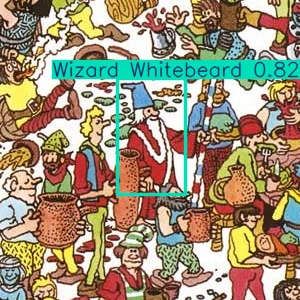

./runs/detect/predict2/3-1-0-7.jpg




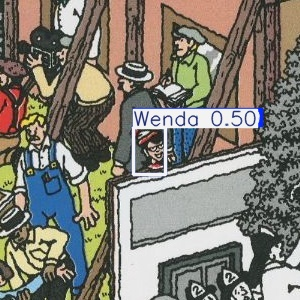

./runs/detect/predict2/4-2-0-0.jpg




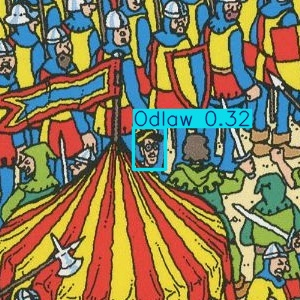

./runs/detect/predict2/4-10-0-2.jpg




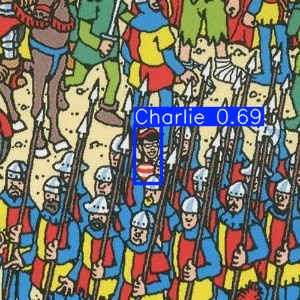

./runs/detect/predict2/4-10-0-0.jpg




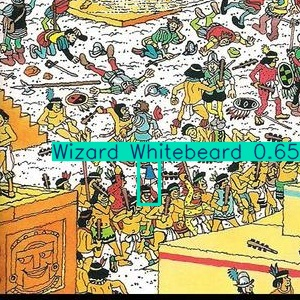

./runs/detect/predict2/2-7-0-3.jpg




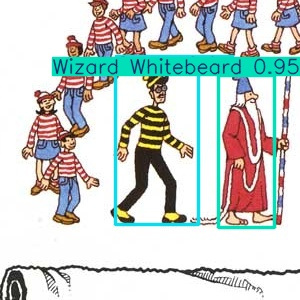

./runs/detect/predict2/3-1-0-5.jpg




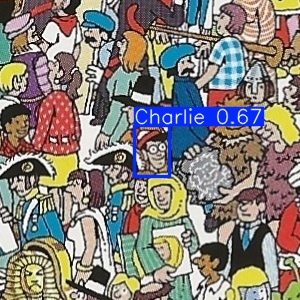

./runs/detect/predict2/6-12-2-0.jpg




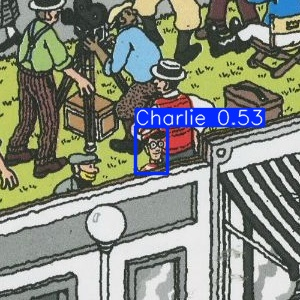

./runs/detect/predict2/4-2-0-1.jpg




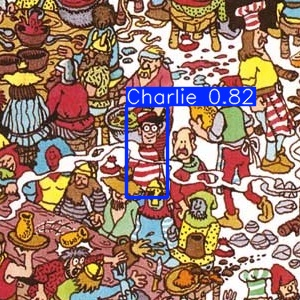

./runs/detect/predict2/3-1-0-1.jpg




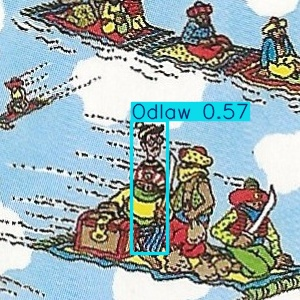

./runs/detect/predict2/3-3-2-1.jpg




In [33]:
import glob
import random
import os
from IPython.display import Image, display

directory = './runs/detect/predict2' # Attention mettre le bon dossier predict (visible au dessus)
image_files = [f for f in os.listdir(directory) if f.endswith('.jpg')]

# Get full paths
image_paths = [os.path.join(directory, f) for f in image_files]

sample_size = min(10, len(image_paths))
for image_path in random.sample(image_paths, sample_size):
  display(Image(filename=image_path, height=400))
  print(image_path)
  print('\n')

## Predict on a full image with a threshold

In [6]:
!cp Charlie-DB/scripts/full_image_predict.py .
!cp Charlie-DB/scripts/visualize_annotations.py .

In [11]:
from full_image_predict import full_image_predict

full_image_predict(model, "./Charlie-DB/original-images/2-7-0.jpg", 300, 0.6)


image 1/77 /content/image_cut/0-0.jpg: 320x320 (no detections), 12.6ms
image 2/77 /content/image_cut/0-1050.jpg: 320x320 1 Charlie, 1 Odlaw, 18.1ms
image 3/77 /content/image_cut/0-1200.jpg: 320x320 1 Charlie, 12.9ms
image 4/77 /content/image_cut/0-1350.jpg: 320x320 (no detections), 15.9ms
image 5/77 /content/image_cut/0-150.jpg: 320x320 (no detections), 14.5ms
image 6/77 /content/image_cut/0-1500.jpg: 320x320 (no detections), 12.5ms
image 7/77 /content/image_cut/0-300.jpg: 320x320 (no detections), 15.1ms
image 8/77 /content/image_cut/0-450.jpg: 320x320 (no detections), 15.6ms
image 9/77 /content/image_cut/0-600.jpg: 320x320 (no detections), 15.1ms
image 10/77 /content/image_cut/0-750.jpg: 320x320 (no detections), 16.0ms
image 11/77 /content/image_cut/0-900.jpg: 320x320 1 Odlaw, 13.1ms
image 12/77 /content/image_cut/150-0.jpg: 320x320 (no detections), 13.0ms
image 13/77 /content/image_cut/150-1050.jpg: 320x320 1 Charlie, 1 Odlaw, 15.0ms
image 14/77 /content/image_cut/150-1200.jpg: 320x

Display the full image with predictions

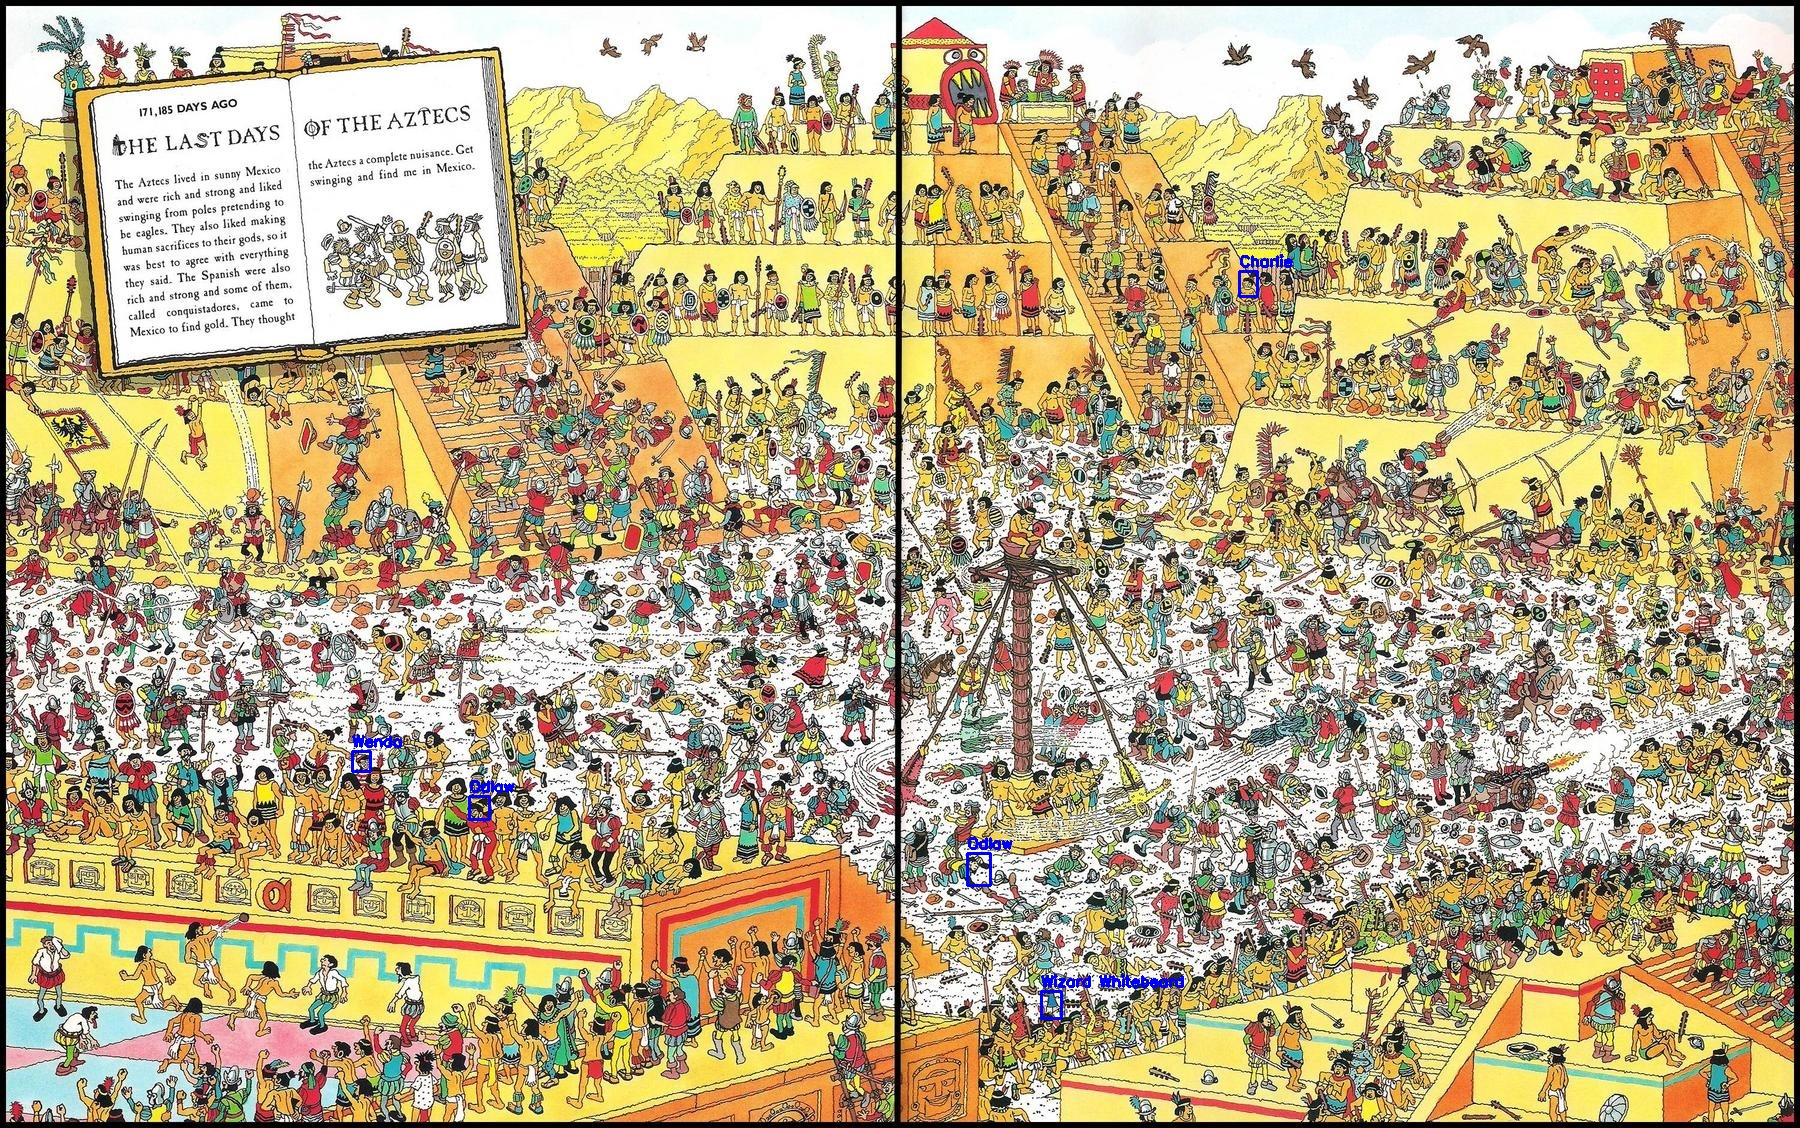

In [12]:
# prompt: display the image located in folder named full_image_output

from IPython.display import Image, display
import os

directory = './full_image_output'
image_files = [f for f in os.listdir(directory) if f.lower().endswith(('.jpg'))]

# Get full paths
image_paths = [os.path.join(directory, f) for f in image_files]

for image_path in image_paths:
  display(Image(filename=image_path, height=400))
  print('\n')

# Export trained model

In [35]:
from google.colab import files
!zip -r train.zip runs/detect/train3/
files.download('train.zip')

updating: runs/detect/train3/ (stored 0%)
updating: runs/detect/train3/train_batch640.jpg (deflated 4%)
updating: runs/detect/train3/confusion_matrix.png (deflated 29%)
updating: runs/detect/train3/train_batch642.jpg (deflated 2%)
updating: runs/detect/train3/args.yaml (deflated 53%)
updating: runs/detect/train3/results.png (deflated 7%)
updating: runs/detect/train3/F1_curve.png (deflated 8%)
updating: runs/detect/train3/val_batch0_pred.jpg (deflated 6%)
updating: runs/detect/train3/confusion_matrix_normalized.png (deflated 26%)
updating: runs/detect/train3/train_batch2.jpg (deflated 0%)
updating: runs/detect/train3/weights/ (stored 0%)
updating: runs/detect/train3/weights/best.pt (deflated 10%)
updating: runs/detect/train3/weights/last.pt (deflated 10%)
updating: runs/detect/train3/train_batch0.jpg (deflated 1%)
updating: runs/detect/train3/labels_correlogram.jpg (deflated 54%)
updating: runs/detect/train3/R_curve.png (deflated 11%)
updating: runs/detect/train3/train_batch641.jpg (def

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Optionnel
model.export(format="onnx")